In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load the dataset
data = pd.read_excel('/content/Pasay, Philippines Weather History (Celsius).xlsx')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)

In [ ]:
data

,Temperature (°C),Humidity (%),Windspeed (mph),Weather Condition
Timestamp,,,,
2023-10-01 00:00:00,28.888889,0.84,5,Thunder in the Vicinity
2023-10-01 01:00:00,27.777778,0.94,7,Light Rain Shower
2023-10-01 02:00:00,27.777778,0.94,6,Partly Cloudy
2023-10-01 03:00:00,27.777778,0.94,5,Mostly Cloudy
2023-10-01 04:00:00,27.777778,0.94,3,Light Rain
...,...,...,...,...
2023-10-27 19:00:00,27.777778,0.84,3,Mostly Cloudy
2023-10-27 20:00:00,27.777778,0.84,0,Mostly Cloudy
2023-10-27 21:00:00,28.888889,0.79,2,Mostly Cloudy


In [ ]:
data.head()

,Temperature (°C),Humidity (%),Windspeed (mph),Weather Condition
Timestamp,,,,
2023-10-01 00:00:00,28.888889,0.84,5,Thunder in the Vicinity
2023-10-01 01:00:00,27.777778,0.94,7,Light Rain Shower
2023-10-01 02:00:00,27.777778,0.94,6,Partly Cloudy
2023-10-01 03:00:00,27.777778,0.94,5,Mostly Cloudy
2023-10-01 04:00:00,27.777778,0.94,3,Light Rain


In [ ]:
data.tail()

,Temperature (°C),Humidity (%),Windspeed (mph),Weather Condition
Timestamp,,,,
2023-10-27 19:00:00,27.777778,0.84,3,Mostly Cloudy
2023-10-27 20:00:00,27.777778,0.84,0,Mostly Cloudy
2023-10-27 21:00:00,28.888889,0.79,2,Mostly Cloudy
2023-10-27 22:00:00,28.888889,0.79,5,Mostly Cloudy
2023-10-27 23:00:00,27.777778,0.84,3,Mostly Cloudy


In [ ]:
data.shape

(647, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 2023-10-01 00:00:00 to 2023-10-27 23:00:00
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature (°C)   647 non-null    float64
 1   Humidity (%)       647 non-null    float64
 2   Windspeed (mph)    647 non-null    int64  
 3   Weather Condition  647 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 25.3+ KB


In [ ]:
# Basic statistics
print("Basic Statistics:")
print(data.describe())

Basic Statistics:
       Temperature (°C)  Humidity (%)  Windspeed (mph)
count        647.000000    647.000000       647.000000
mean          28.383995      0.825131         5.157651
std            3.209310      0.107625         4.013121
min          -17.777778      0.000000         0.000000
25%           27.222222      0.740000         2.000000
50%           27.777778      0.840000         5.000000
75%           30.000000      0.890000         7.000000
max           33.888889      1.000000        21.000000


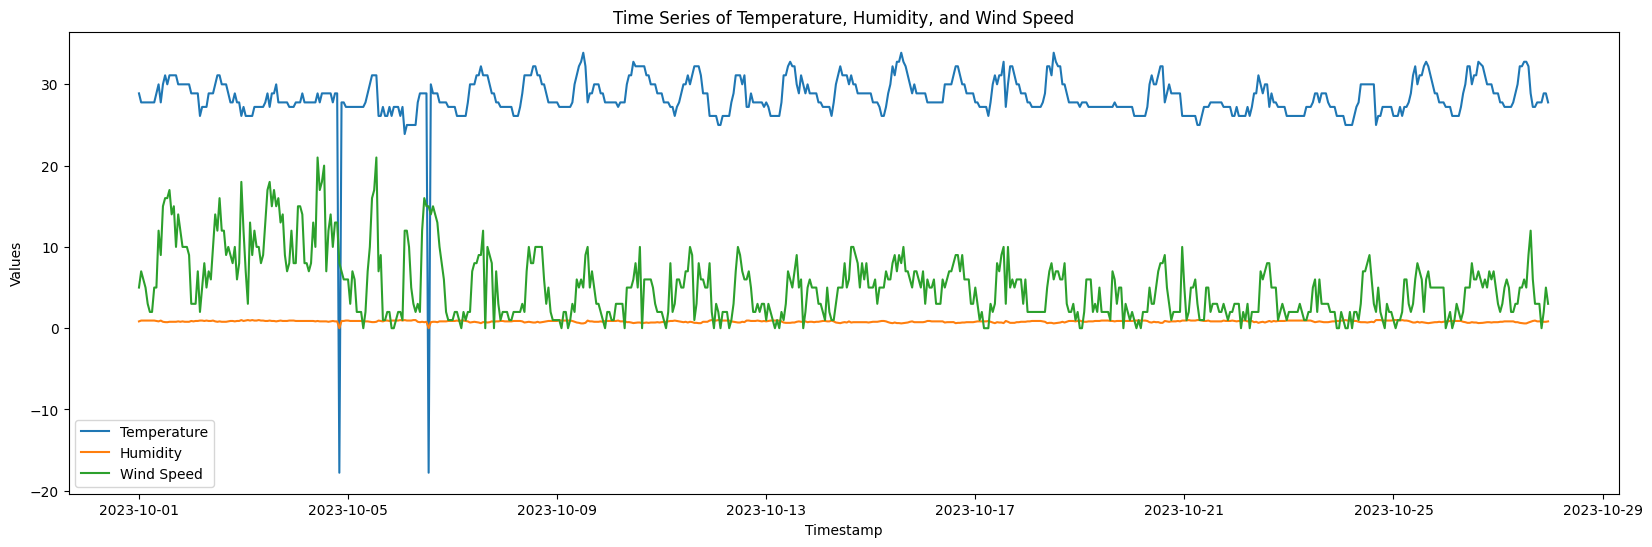

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(data['Temperature (°C)'], label='Temperature')
plt.plot(data['Humidity (%)'], label='Humidity')
plt.plot(data['Windspeed (mph)'], label='Wind Speed')
plt.title('Time Series of Temperature, Humidity, and Wind Speed')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.show()

Weather Condition Distribution:
Mostly Cloudy              257
Fair                       163
Partly Cloudy              112
Light Rain                  53
Cloudy                      27
Light Rain Shower           15
Light Rain with Thunder      6
Showers in the Vicinity      4
Mist                         3
Rain Shower                  2
Mostly Cloudy / Windy        2
Thunder in the Vicinity      1
Rain                         1
T-Storm                      1
Name: Weather Condition, dtype: int64


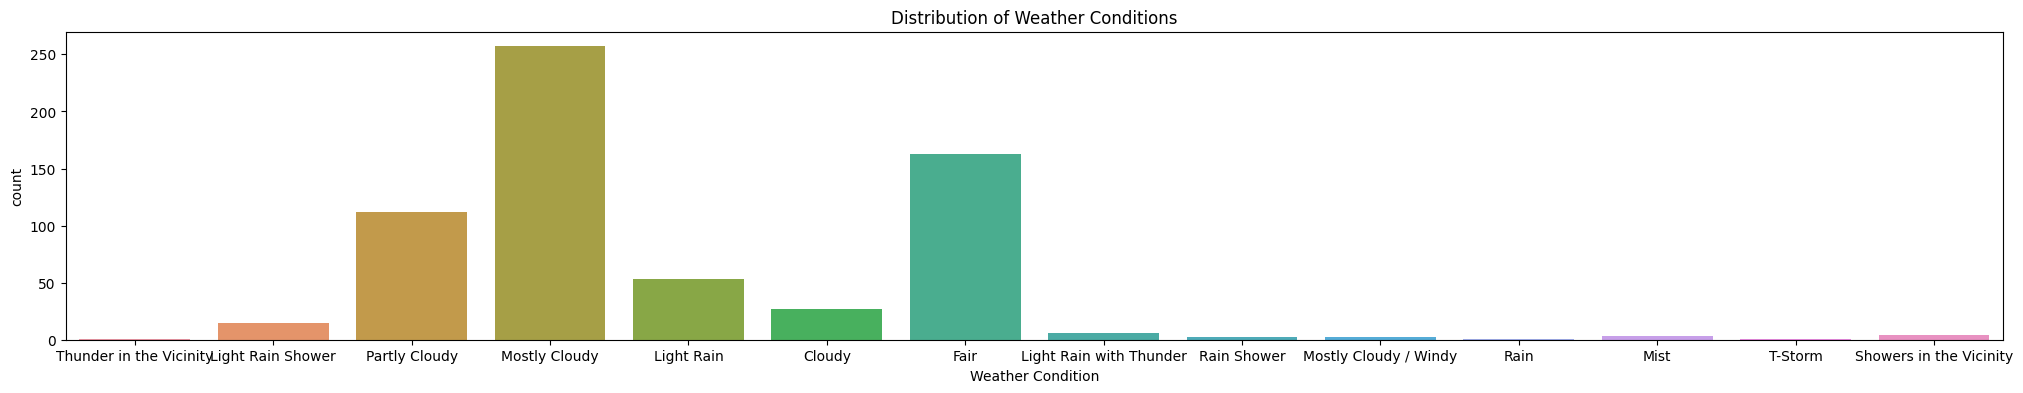

In [ ]:
weather_condition_counts = data['Weather Condition'].value_counts()
print("Weather Condition Distribution:")
print(weather_condition_counts)

# Bar Charts
plt.figure(figsize=(25, 4))
sns.countplot(x='Weather Condition', data=data)
plt.title('Distribution of Weather Conditions')
plt.show()

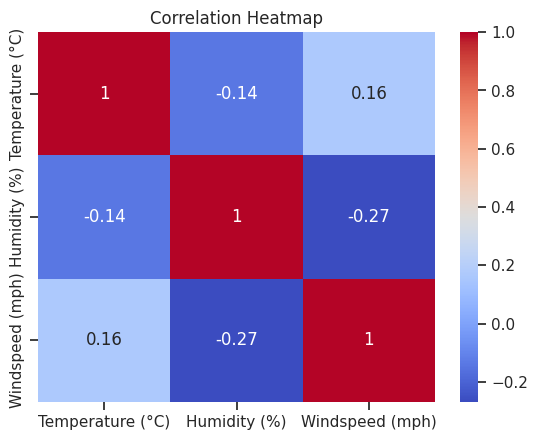

In [ ]:
# Correlation Analysis
corr_matrix = data[['Temperature (°C)', 'Humidity (%)', 'Windspeed (mph)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

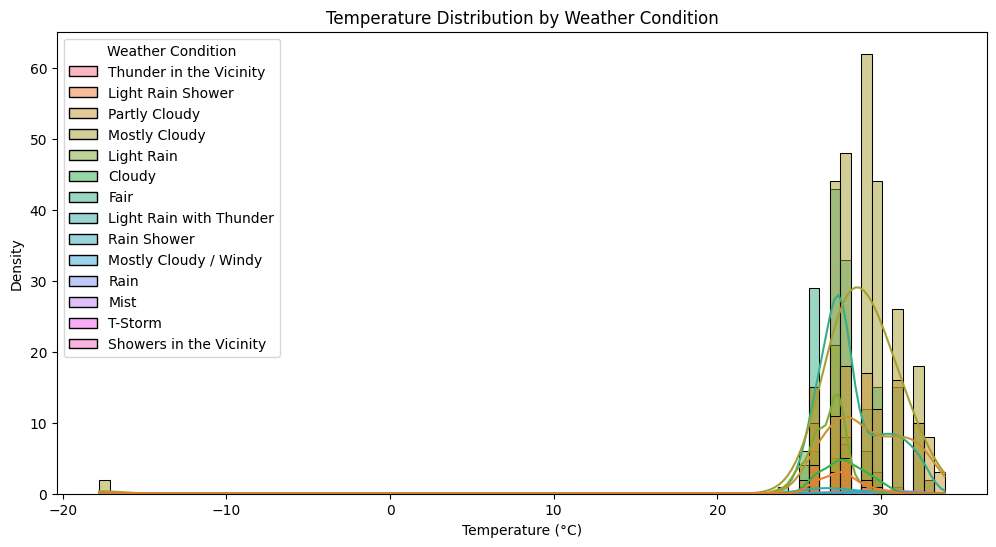

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Temperature (°C)', hue='Weather Condition', kde=True, common_norm=False)
plt.title('Temperature Distribution by Weather Condition')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.show()

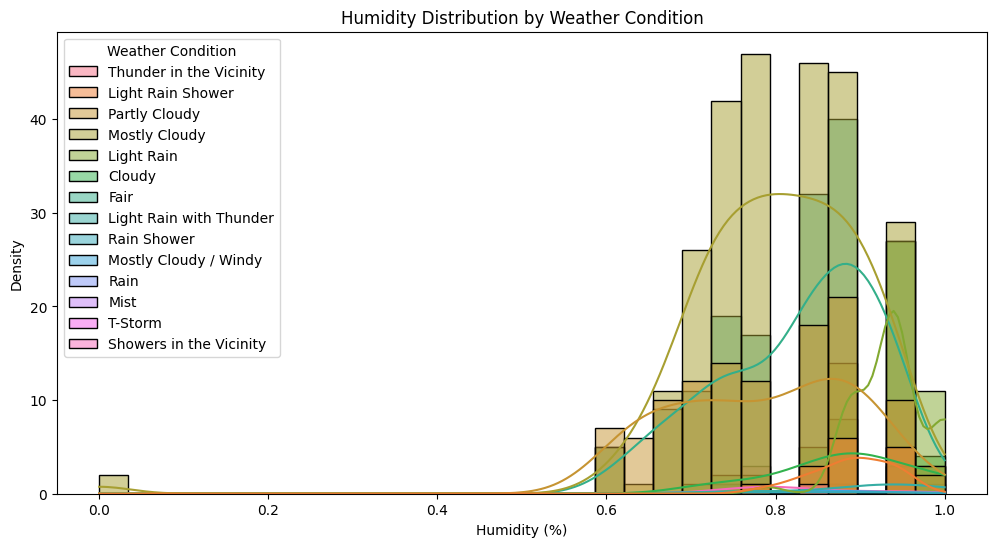

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Humidity (%)', hue='Weather Condition', kde=True, common_norm=False)
plt.title('Humidity Distribution by Weather Condition')
plt.xlabel('Humidity (%)')
plt.ylabel('Density')
plt.show()

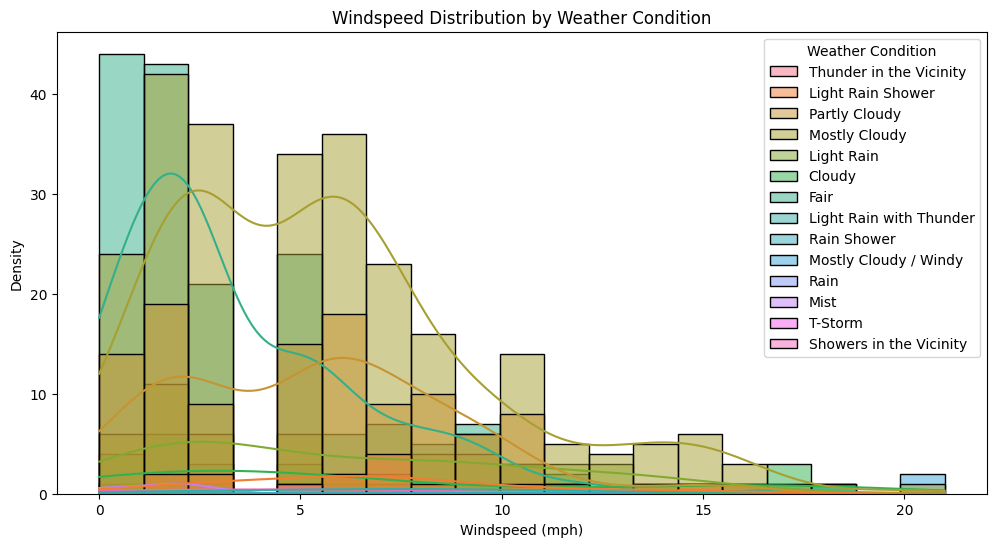

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Windspeed (mph)', hue='Weather Condition', kde=True, common_norm=False)
plt.title('Windspeed Distribution by Weather Condition')
plt.xlabel('Windspeed (mph)')
plt.ylabel('Density')
plt.show()

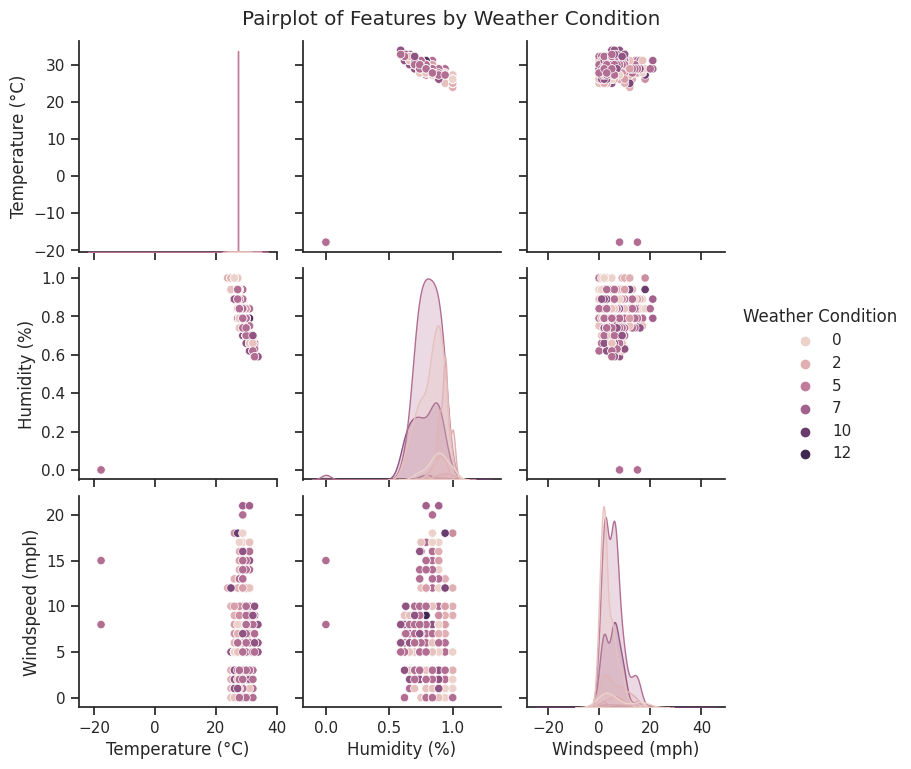

In [ ]:
# Set style for the pairplot
sns.set(style="ticks")

# Create the pairplot with filled markers
pairplot = sns.pairplot(data, hue='Weather Condition', markers="o")

# Customize the pairplot (optional)
pairplot.fig.suptitle("Pairplot of Features by Weather Condition", y=1.02)

# Show the pairplot
plt.show()

In [ ]:
label_encoder = LabelEncoder()
# Encode the categorical labels
data['Weather Condition'] = label_encoder.fit_transform(data['Weather Condition'])

# Prepare the data
X = data[['Temperature (°C)', 'Humidity (%)', 'Windspeed (mph)']]
y = data['Weather Condition']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train a Logistic Regression model with explicit feature names
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_scaled, y_train)

# Logistic Regression
y_logistic_pred = logistic_classifier.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_logistic_pred)
print("Logistic Regression Model:")
print(f"Classification Accuracy: {accuracy_logistic}")
print("Classification Report:")
print(classification_report(y_test, y_logistic_pred, zero_division=1))

Logistic Regression Model:
Classification Accuracy: 0.4307692307692308
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       0.38      0.47      0.42        30
           2       0.50      0.37      0.42        19
           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1
           6       0.44      0.68      0.53        50
           7       1.00      0.00      0.00         2
           8       1.00      0.05      0.09        21
          10       1.00      0.00      0.00         1

    accuracy                           0.43       130
   macro avg       0.81      0.17      0.16       130
weighted avg       0.57      0.43      0.38       130



In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions with Random Forest
y_rf_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
print("Random Forest Model:")
print(f"Classification Accuracy: {accuracy_rf}")
print("Classification Report:")
print(classification_report(y_test, y_rf_pred, zero_division=1))

Random Forest Model:
Classification Accuracy: 0.4153846153846154
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.42      0.33      0.37        30
           2       0.55      0.32      0.40        19
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.48      0.64      0.55        50
           7       1.00      0.00      0.00         2
           8       0.32      0.29      0.30        21
          10       1.00      0.00      0.00         1
          11       0.00      1.00      0.00         0

    accuracy                           0.42       130
   macro avg       0.38      0.26      0.16       130
weighted avg       0.43      0.42      0.40       130



In [ ]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions with Decision Tree
y_dt_pred = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Model:")
print(f"Classification Accuracy: {accuracy_dt}")
print("Classification Report:")
print(classification_report(y_test, y_dt_pred, zero_division=1))

Decision Tree Model:
Classification Accuracy: 0.4307692307692308
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.45      0.47      0.46        30
           2       0.57      0.42      0.48        19
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.48      0.60      0.53        50
           7       1.00      0.00      0.00         2
           8       0.31      0.19      0.24        21
          10       1.00      0.00      0.00         1

    accuracy                           0.43       130
   macro avg       0.42      0.19      0.19       130
weighted avg       0.44      0.43      0.42       130



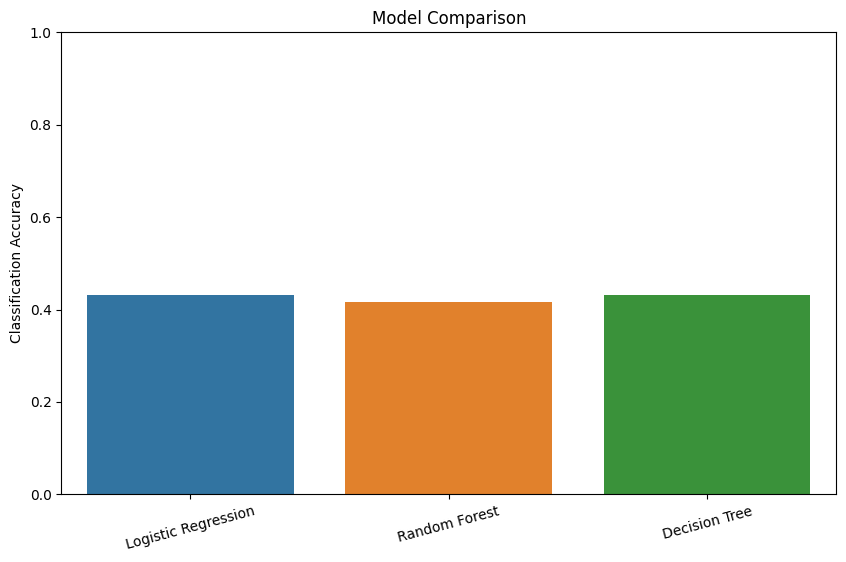

In [ ]:
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_dt]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Classification Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()